In [1]:
from germination.yy_class import callDB, par, germination

dbcnt = callDB('127.0.0.1', 3306, 'root', 'yyos12345678', 'yyostech_2')
start = '2020-07-01'
end = '2020-08-01'
data = dbcnt.get_dashboard_data(start, end)
df = pd.DataFrame(data, columns=['生產序號', '作物編號', '播種日期', '出貨日期', '品種名稱', '客戶名稱', '播種數量', '發芽數量', '發芽率'])
df

error


UnboundLocalError: local variable 'data' referenced before assignment

In [26]:
from germination.yy_class import callDB, par, germination
from datetime import timedelta
dbcnt = callDB('127.0.0.1', 3306, 'root', 'yyos12345678', 'yyostech_2')
productionid = '200807019'
data = dbcnt.get_parameter(productionid)
# data
series_id = data[0]
thresholds = data[3]
percent = data[2]
saw_pieces = 4
ger_cnt = 380
non_ger_cnt = saw_pieces*96 - ger_cnt
res_data = dbcnt.get_summary(productionid)
total_sponge = sum(x[3] for x in res_data)*12*8
sum_n = sum(x[4] for x in res_data)
total_perecnt = round((sum_n/total_sponge)*100, 2)
print(total_sponge, sum_n, total_perecnt)
parameter = dbcnt.get_parameter(productionid)
nursery_rate = parameter[4]
thinning_rate = parameter[5]
cultivation_rate = parameter[6]
lastday = str(parameter[7] - timedelta(days=1))
print(parameter[0], lastday)
data = dbcnt.get_lastday(parameter[0], lastday)
if data[0] == None:
    data = [0, 0]
print(data)
print(data, total_sponge)
new_total_sponge = (data[1]*96)+total_sponge
new_fer_cnt = data[0]+sum_n
less_per = (float(nursery_rate) - float(new_fer_cnt/new_total_sponge))
less_cnt = 96 / less_per / nursery_rate / thinning_rate / cultivation_rate
print(less_per, less_cnt)
less_piece = int(round((less_cnt / 96), 0))
print(less_piece, '片')
text = f'''[發芽率異常通報]\n生產序號：{productionid} ({parameter[0]})\n共播種{total_sponge:,d}株，發芽{sum_n:,d}株，\n發芽率{total_perecnt:.2f}%，\n未達到育苗標準{nursery_rate*100}%，\n統計昨日{parameter[0]}播種紀錄，\n(播{int(data[0]):,d}株，發芽{int(data[1]):,d}株)，\n仍差{less_per*100:.2f}%，應補播{less_piece}片。'''
text

3648 2613 71.63
13G11 2020-08-06
(Decimal('4825'), Decimal('82'))
(Decimal('4825'), Decimal('82')) 3648
0.1543402777777778 863.8920134983124
9 片


'[發芽率異常通報]\n生產序號：200807019 (13G11)\n共播種3,648株，發芽2,613株，\n發芽率71.63%，\n未達到育苗標準80.0%，\n統計昨日13G11播種紀錄，\n(播4,825株，發芽82株)，\n仍差15.43%，應補播9片。'

In [20]:
less_piece

9

In [3]:


productionid = production_number_dropdown
sliceNum = saw_pieces
ctx = dash.callback_context.triggered
print(ctx)print('辨識確認的照片序號並儲存')
# 取得照片
image, photoid = dbcnt.get_use_photo()
# 取得參數
data = dbcnt.get_parameter(productionid)
# 辨識照片
series_id = data[0]
thresholds = data[3]
percent = data[2]
ger = germination(series_id, percent, saw_pieces)
res, ger_cnt = ger.identify(image)
non_ger_cnt = saw_pieces*96 - ger_cnt
# 儲存結果
processid = 'process_'+uuid.uuid1().hex
process_record = (processid, productionid, photoid, sliceNum, ger_cnt)
dbcnt.save_germination_record(process_record, ger.result_list)
photo = go.Figure()
print('統計中...')
res_data = dbcnt.get_summary(productionid)
total_sponge = sum(x[3] for x in res_data)*12*8
sum_n = sum(x[4] for x in res_data)
total_perecnt = round((sum_n/total_sponge)*100, 2)
print(total_sponge, sum_n, total_perecnt)
parameter = dbcnt.get_parameter(productionid)
nursery_rate = parameter[4]
thinning_rate = parameter[5]
cultivation_rate = parameter[6]
if nursery_rate >= sum_n/total_sponge:  # 沒達到：加上昨天的播種紀錄計算發芽率是否有達到 nursery_rate
    lastday = str(parameter[7] - timedelta(days=1))
    print(parameter[0], lastday)
    data = dbcnt.get_lastday(parameter[0], lastday)
    if data[0] == None:
        data = [0, 0]
    print(data)
    print(data, total_sponge)
    new_total_sponge = (data[1]*96)+total_sponge
    new_fer_cnt = data[0]+sum_n
    if nursery_rate >= new_fer_cnt/new_total_sponge:  # 未達標：計算要播幾片 nursery_rate thinning_rate cultivation_rate
        print('補播')
        less_per = (float(nursery_rate) - float(new_fer_cnt/new_total_sponge))
        less_cnt = 96 / less_per / nursery_rate / thinning_rate / cultivation_rate
        print(less_per, less_cnt)
        less_piece = int(round((less_cnt / 96), 0))
        print(less_piece, '片')
        text = f'''[發芽率異常通報]\n生產序號：{productionid} ({parameter[0]})\n
        共播種{total_sponge:,d}株，發芽{sum_n:,d}株，\n發芽率{total_perecnt:.2f}%，\n
        未達到育苗標準{nursery_rate*100}%，\n統計昨日{parameter[0]}播種紀錄，\n
        (播{data[0]:,d}株，發芽{data[1]:,d}株)，\n仍差{less_per*100:.2f}%，應補播{less_piece}片。'''

'[發芽率異常通報]\n生產序號：1111 (1)\n共播種1,000株，發芽1,000株，\n發芽率90.50%，\n未達到育苗標準80.0%，\n統計昨日1播種紀錄，\n(播123株，發芽123株)，\n仍差1200.00%，應補播1片。'

In [6]:
import pymysql
import pandas as pd
db = pymysql.connect(host='127.0.0.1',
                             port=3306,
                             user='root',
                             password='yyos12345678',
                             db='yyostech_2')
cursor = db.cursor()
sql='''
    select 
    a.schedule_id as `生產序號`
    , concat(demands_id, a.crop_id, supplier_id) as `作物編號`
    , sowing_date as `播種日期`
    , require_date as `出貨日期`
    , b.`name` as `品種名稱`
    , d.`name` as `客戶名稱`
    , sum(c.piece) * 96 as `播種數量`
    , (sum(c.germination_cnt)+(case when add_ger_cnt is not null then add_ger_cnt else 0 end)) as `發芽數量`
    , (sum(c.germination_cnt)+(case when add_ger_cnt is not null then add_ger_cnt else 0 end)) / (sum(c.piece) * 96) as `發芽率`
    from crop_schedule a
    inner join crop_name b on b.crop_id = a.crop_id
    inner join process c on a.schedule_id = c.schedule_id
    inner join customer d on d.cust_id = a.cust_id
    left join (
        select 
        c.schedule_id
        , sum(a.judge_result) as add_ger_cnt
        from artificial_judgment a
        inner join sponge b on a.sponge_id = b.sponge_id
        inner join process c on b.process_id = c.process_id
        group by  c.schedule_id
    ) e on e.schedule_id = a.schedule_id
    where a.sowing_date >= %s and a.sowing_date <= %s
    group by a.schedule_id
    , concat(demands_id, a.crop_id, supplier_id)
    , sowing_date
    , require_date
    , b.`name`
    order by a.schedule_id;
    '''
cursor.execute(sql,(start, end))
data = cursor.fetchall() 
df = pd.DataFrame(data, columns=['生產序號', '作物編號', '播種日期', '出貨日期', '品種名稱', '客戶名稱', '播種數量', '發芽數量', '發芽率'])
df

生產序號   作物編號        播種日期        出貨日期   品種名稱         客戶名稱   播種數量  發芽數量  \
0   200703008  13G11  2020-07-03  2020-08-19  裂葉芝麻葉  Skylark_楊先生   5376  4993   
1   200704009  13G11  2020-07-04  2020-08-19  裂葉芝麻葉  Skylark_楊先生   3456  3271   
2   200704010  13G11  2020-07-04  2020-08-20  裂葉芝麻葉       新霖_王'r   3072  3019   
3   200708018  13G11  2020-07-08  2020-08-24  裂葉芝麻葉         沙拉農塲   8448  8218   
4   200708019  13G11  2020-07-08  2020-08-24  裂葉芝麻葉       新霖_王'r   4608  4143   
5   200709020  13G11  2020-07-09  2020-08-24  裂葉芝麻葉          水野菜   3840  3779   
6   200709022  12GK4  2020-07-09  2020-08-17    山葵菜          水野菜   1152   982   
7   200710025  13G11  2020-07-10  2020-08-26  裂葉芝麻葉  Skylark_楊先生   5376  5351   
8   200711026  13G11  2020-07-11  2020-08-26  裂葉芝麻葉  Skylark_楊先生   3072  2998   
9   200711027  13G11  2020-07-11  2020-08-27  裂葉芝麻葉       新霖_王'r   3456  3360   
10  200712028  13G11  2020-07-12  2020-08-27  裂葉芝麻葉         沙拉農塲   8448  8217   
11  200712031  11G43  2020-07-12  2019-08-30  奶油波士頓          水野菜   1536  1531   
12  200713032  13G11  2020-07-13  2020-08-27  裂葉芝麻葉          預下量   4992  4517   
13  200714034  13G11  2020-07-14  2020-08-31  裂葉芝麻葉          水野菜   3456  3435   
14  200715035  13G11  2020-07-15  2020-08-31  裂葉芝麻葉         沙拉農塲   8064  8017   
15  200715036  13G11  2020-07-15  2020-08-31  裂葉芝麻葉       新霖_王'r   3072  3049   
16  200716037  13G11  2020-07-16  2020-08-31  裂葉芝麻葉          水野菜   3456  3428   
17  200716039  12GK4  2020-07-16  2020-08-24    山葵菜          水野菜    768   612   
18  200722052  13G11  2020-07-22  2020-09-07  裂葉芝麻葉         沙拉農塲  12288  9947   
19  200723054  13G11  2020-07-23  2020-09-07  裂葉芝麻葉          水野菜   3456  3095   
20  200723056  12GK4  2020-07-23  2020-08-31    山葵菜          水野菜   1152   787   
21  200724059  13G11  2020-07-24  2020-09-09  裂葉芝麻葉  Skylark_楊先生   4992  4696   
22  200725060  13G11  2020-07-25  2020-09-09  裂葉芝麻葉  Skylark_楊先生   3072  2279   
23  200729070  13G11  2020-07-29  2020-09-14  裂葉芝麻葉       新霖_王'r   3072  2646   
24  200730071  13G11  2020-07-30  2020-09-14  裂葉芝麻葉          水野菜   2976  2583   
25  200730076  13G26  2020-07-30  2020-09-10     蘿勒       新霖_王'r    576   573   
26  200730077  13G26  2020-07-30  2020-09-10     蘿勒          預下量    960   663   
27  200731078  13G11  2020-07-31  2020-09-16  裂葉芝麻葉  Skylark_楊先生   4992  3843   
28  200801001  13G11  2020-08-01  2020-09-14  裂葉芝麻葉         沙拉農塲   6720  5458   

       發芽率  
0   0.9288  
1   0.9465  
2   0.9827  
3   0.9728  
4   0.8991  
5   0.9841  
6   0.8524  
7   0.9953  
8   0.9759  
9   0.9722  
10  0.9727  
11  0.9967  
12  0.9048  
13  0.9939  
14  0.9942  
15  0.9925  
16  0.9919  
17  0.7969  
18  0.8095  
19  0.8955  
20  0.6832  
21  0.9407  
22  0.7419  
23  0.8613  
24  0.8679  
25  0.9948  
26  0.6906  
27  0.7698  
28  0.8122

In [1]:
import pandas as pd
import numpy
import cv2
import pymysql
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

photo_77f0e21ad6ca11ea872ab42e99c8ec5d


C:\Users\wen\anaconda3\envs\yyostech\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


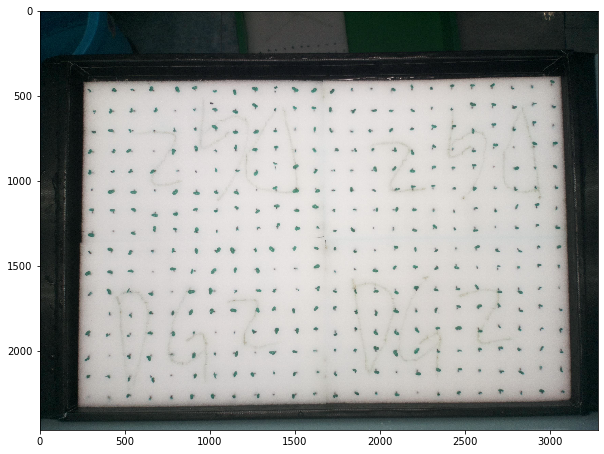

4
done
photo_4811881cd6ca11ea9777b42e99c8ec5d


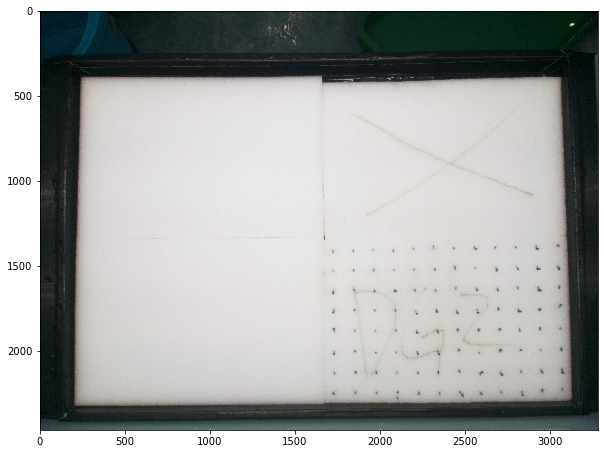

1
done
photo_f2e8d6f8d6c911eab366b42e99c8ec5d


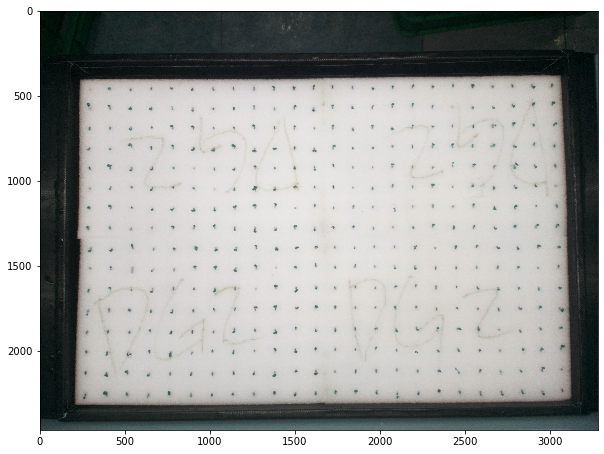

4
done
photo_cbd18574d6c911ea831bb42e99c8ec5d


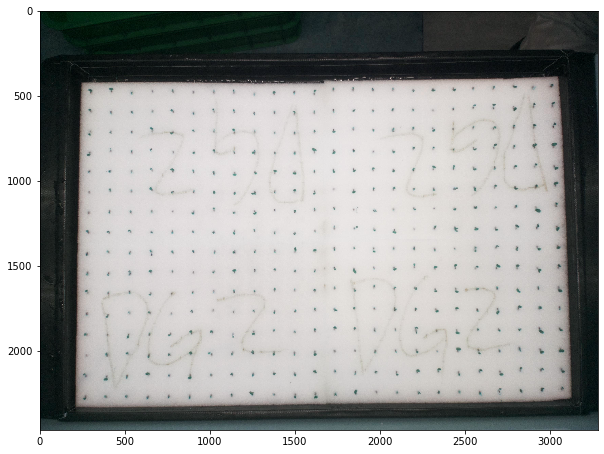

4
done
photo_518644ded6c511eab302b42e99c8ec5d


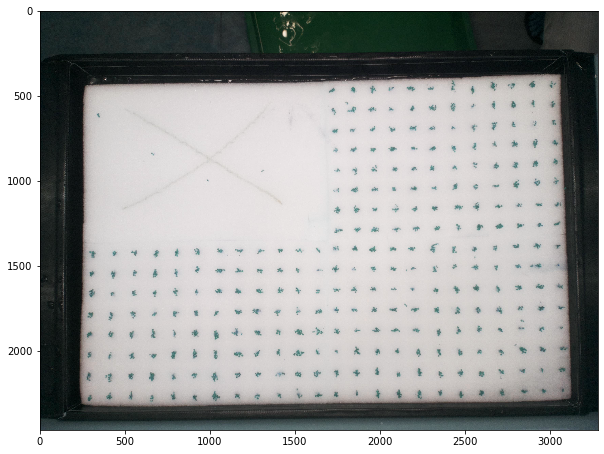

3
done
photo_14751c82d6c411eab0c3b42e99c8ec5d


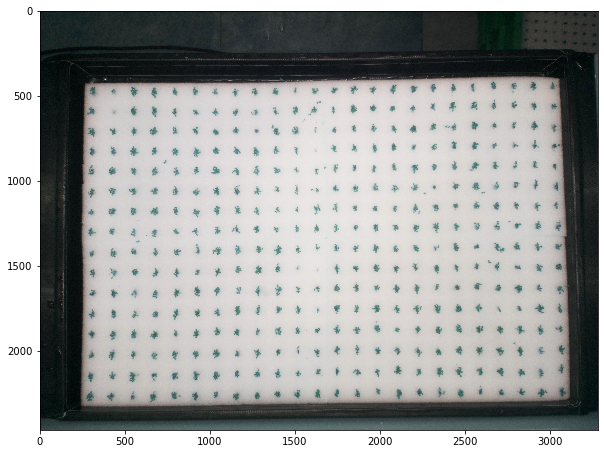

4
done
photo_2eed164cd6c111ea9850b42e99c8ec5d


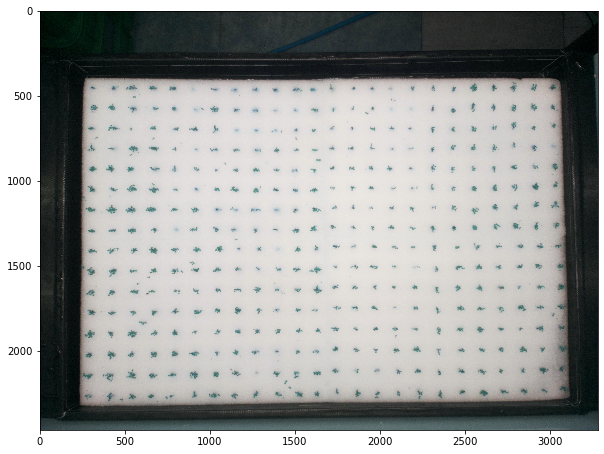

4
done
photo_0752892ed6c111ea8fe5b42e99c8ec5d


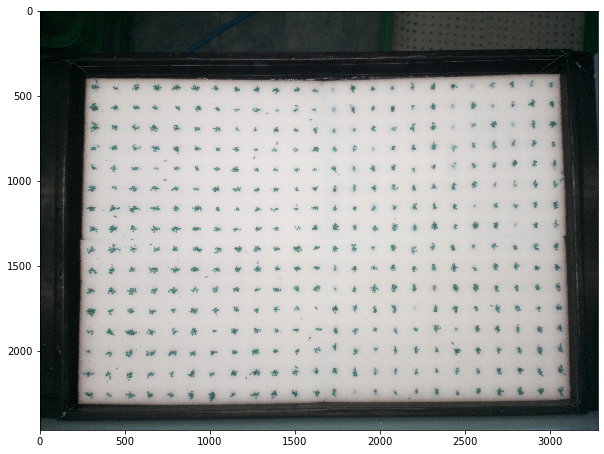

4
done
photo_701a387ad6bf11ea9a0ab42e99c8ec5d


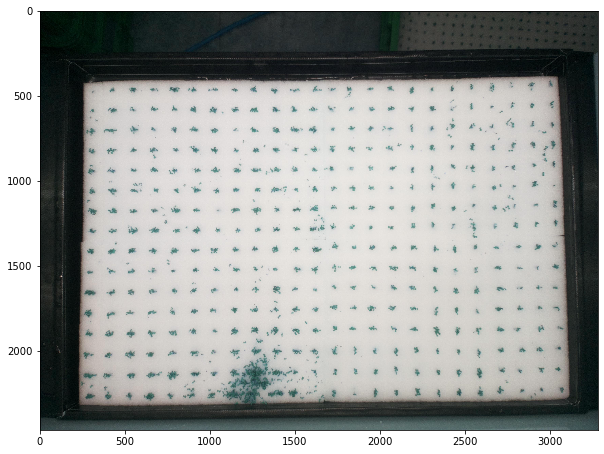

4
done
photo_51309e4cd6bf11ea9eebb42e99c8ec5d


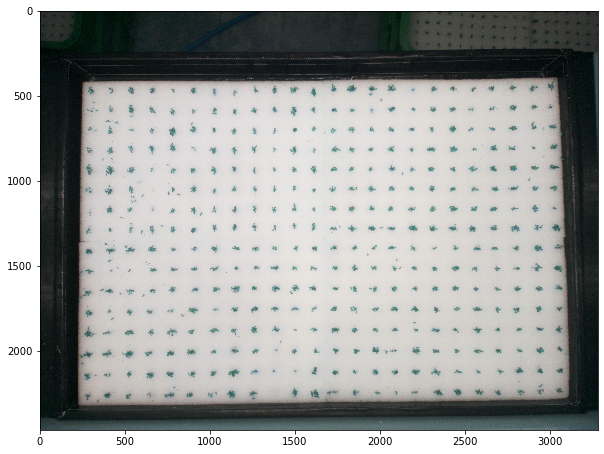

4
done
photo_338a611ed6bf11eaae45b42e99c8ec5d


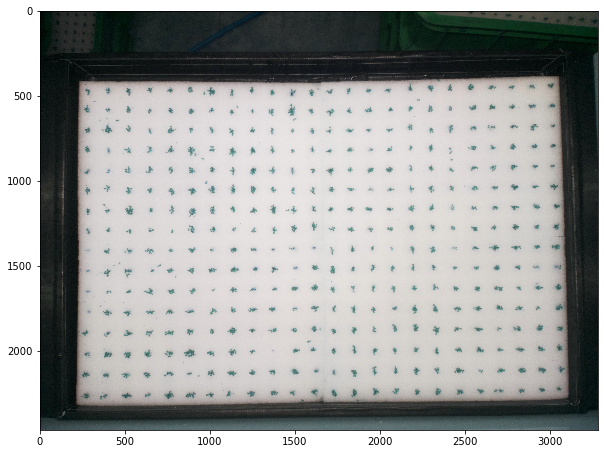

4
done
photo_0f3e7b68d6bf11eaba7db42e99c8ec5d


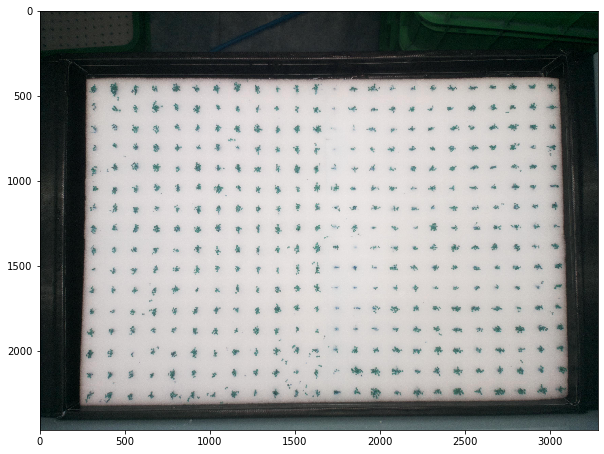

4
done
photo_e0fc5d4cd6be11eaa973b42e99c8ec5d


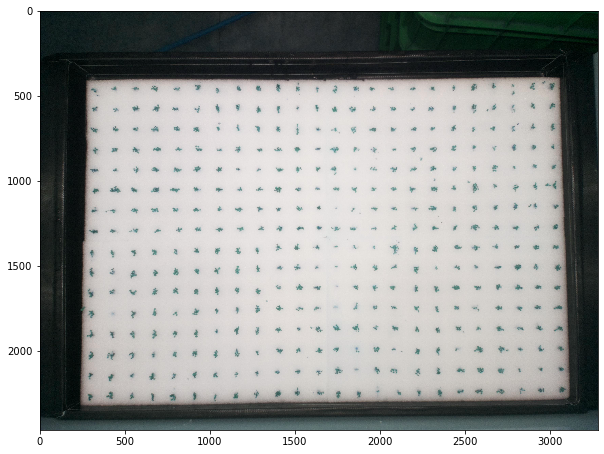

4
done
photo_d96625b4d5f511eabbf1b42e99c8ec5d


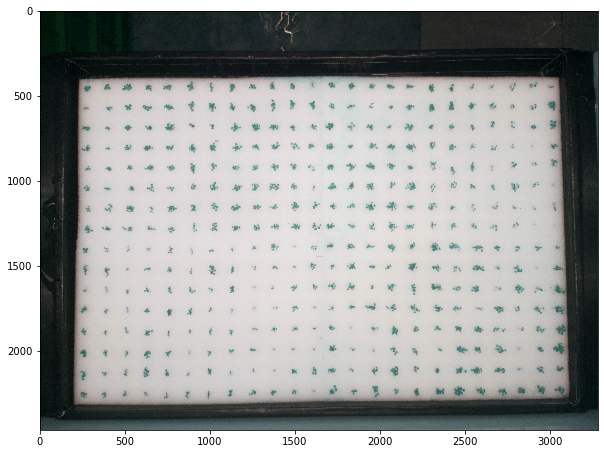

4
done
photo_a7d115f6d5f511eabdb2b42e99c8ec5d


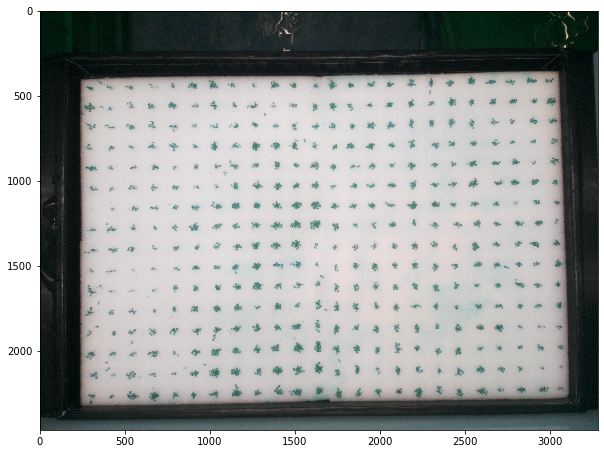

4
done
photo_7a0ea010d5f511eab875b42e99c8ec5d


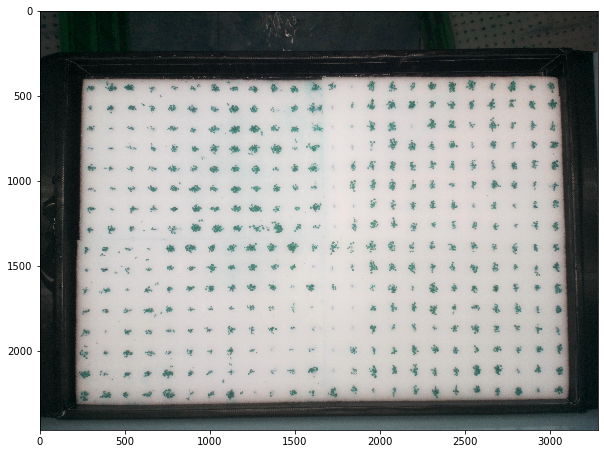

4
done
photo_4c626988d5f511eaba26b42e99c8ec5d


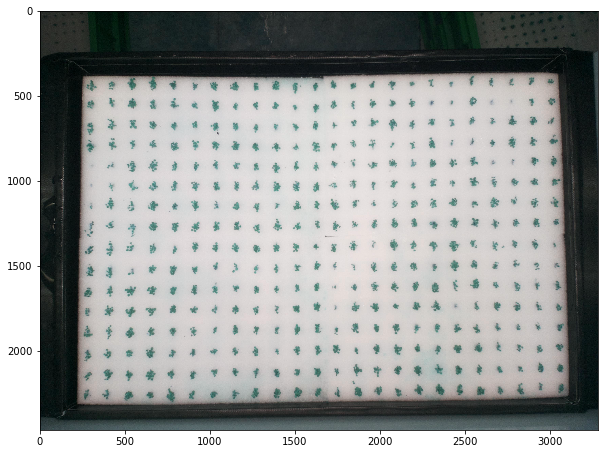

4
done
photo_221d1eb0d5f511ea9337b42e99c8ec5d


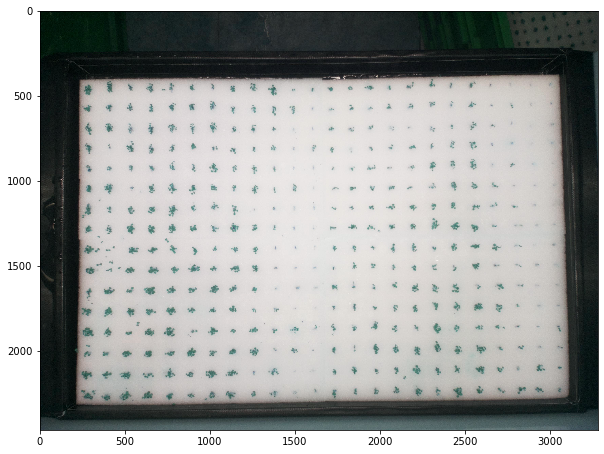

4
done
photo_8be478bad5f411ea9b4cb42e99c8ec5d


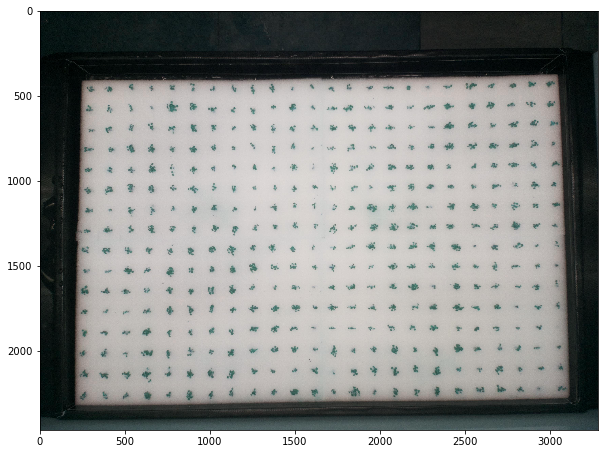

4
done
photo_d3351366d5f211eab11ab42e99c8ec5d


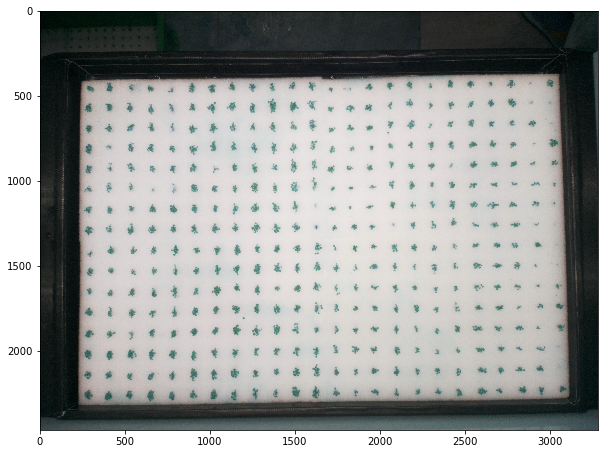

4
done
photo_6a03938cd5f211eaa148b42e99c8ec5d


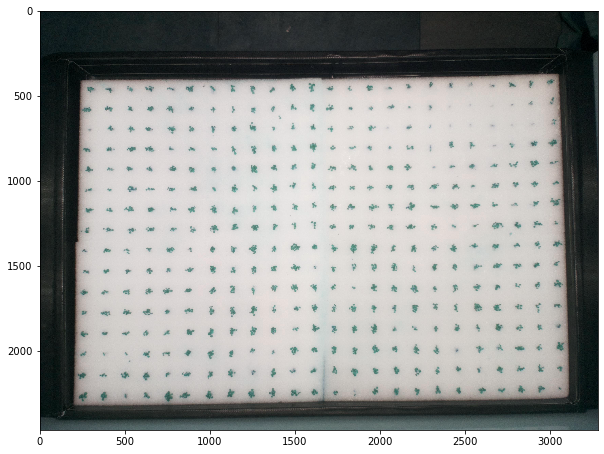

4
done
photo_d35e8b82d58811ea8334b42e99c8ec5d


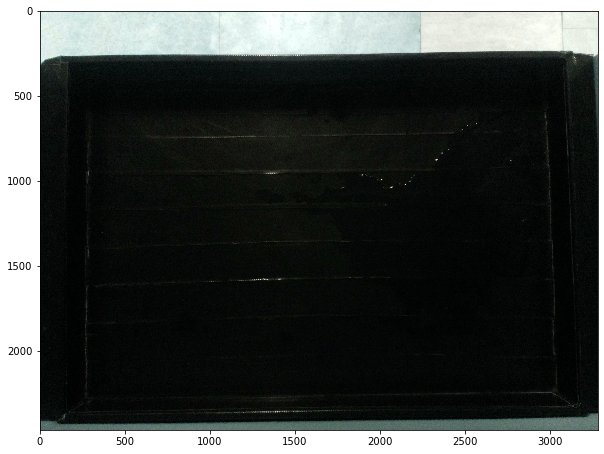

4
done
photo_aa9d3c28d2cd11ea8846b42e99c8ec5d


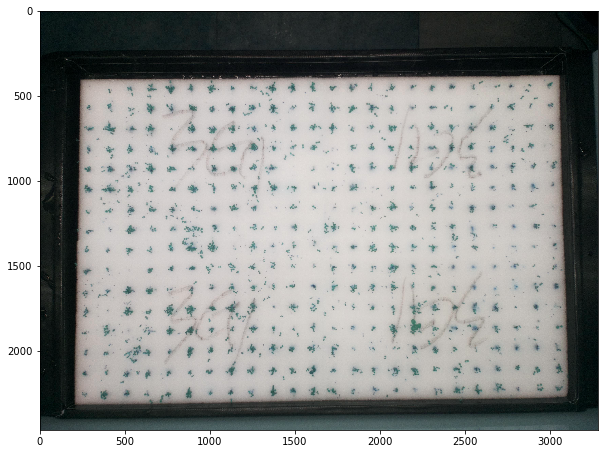

KeyboardInterrupt: 

In [2]:
while True:
    db = pymysql.connect(host='127.0.0.1',
                                 port=3306,
                                 user='root',
                                 password='yyos12345678',
                                 db='yyostech_2')
    cursor = db.cursor()
    sql=f'''
    select *
    from raspi_image
    where piece is null
    order by create_datetime desc
    limit 1
    '''
    cursor.execute(sql)
    data = cursor.fetchone()
    
    pid = data[0]
    img = data[1]
    print(pid)
    nparr = np.fromstring(img, np.uint8)
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR ) # cv2.IMREAD_COLOR in OpenCV 3.1
    plt.imshow(img_np)
    plt.show()
    x = input()
    try:
        sql='''
        UPDATE `yyostech_2`.`raspi_image` SET `piece` = %s WHERE (`image_id` = %s);
            '''
        cursor.execute(sql,(x, pid))
        db.commit()
        print('==========================')
        print('done')
    except:
        print('error')
        db.rollback()
    finally:
        cursor.close()
        db.close()

In [2]:
import pandas as pd
import os
os.listdir('//Nas001/發芽率e化')

pd.read_excel('//Nas001/發芽率e化/生產排程2020 1-12月 .xlsx')

使用狀態(Y/N/T)     開始使用時間       結束時間   種子商     編碼             品種  育苗良率  疏苗良率  \
0            N  107/03/07  109/05/25  活力農業  13G11          裂葉芝麻葉   0.7   NaN   
1            Y  109/05/25        NaN  活力農業  13G11          裂葉芝麻葉   0.8   NaN   
2            Y        NaN        NaN    稼穡  11G72             蘿蔓   0.8   NaN   
3            Y  107/03/15        NaN    稼穡  11G12            綠火焰   0.7  0.90   
4            Y        NaN        NaN    稼穡  11RD2            紅甜心   0.8   NaN   
5            Y        NaN        NaN    瑞禾  11G43          奶油波士頓   0.9  0.90   
6            Y  107/03/19        NaN    瑞禾  11G53            綠橡木   0.8  0.90   
7            Y        NaN        NaN    高朋  12GK4            山葵菜   0.8   NaN   
8            Y        NaN        NaN    興農  12GD5           羽衣甘藍   0.8  0.90   
9            Y        NaN        NaN    興農  32GD5         羽衣baby   0.9   NaN   
10           Y        NaN        NaN  蔬菜之家  13G26         蘿勒 3G2   0.8  0.90   
11           Y        NaN        NaN    農友  11RB7            紅寶石   0.8   NaN   
12           Y        NaN        NaN   新合成  14G18             紫蘇   0.8  0.95   
13           N        NaN        NaN   NaN   14G4           圓葉芝麻   0.8   NaN   
14           N        NaN        NaN   NaN   11G2             綠皺   0.9  0.90   
15           N        NaN        NaN   NaN   11G3            綠珊瑚   NaN   NaN   
16           N        NaN        NaN    興農  11G45          奶油波士頓   0.8   NaN   
17           N        NaN        NaN   NaN   11GG             大將   NaN   NaN   
18           N        NaN        NaN   NaN   11GA           福山萵苣   NaN   NaN   
19           N        NaN        NaN   NaN   11G7             蘿蔓   0.8  0.90   
20           N        NaN        NaN   NaN   12G8        羽衣甘藍(水)   NaN   NaN   
21           N        NaN        NaN   NaN   11G8          義大利生菜   0.8  0.90   
22           N        NaN        NaN   NaN    NaN            NaN   NaN   NaN   
23           N        NaN        NaN   NaN   11R1            紅火焰   0.5  0.90   
24           N        NaN        NaN   NaN   11R3        赤珊瑚(紅捲)   0.7  0.90   
25           N        NaN        NaN   NaN   11R5            紅橡木   0.8  0.90   
26           N        NaN        NaN   NaN   11R7            紅蘿蔓   0.8  0.90   
27           N        NaN        NaN   NaN   11RH        紅珊瑚(三愛)   0.4  0.90   
28           N        NaN        NaN   NaN   11P7            紫蘿蔓   0.8  0.90   
29           N        NaN        NaN   NaN   11RE            粉蕾絲   NaN   NaN   
30           N        NaN        NaN   NaN    NaN            NaN   NaN   NaN   
31           N        NaN        NaN   NaN   12GE      羽衣甘藍(A50)   0.8   NaN   
32           N        NaN        NaN   NaN   12GF      羽衣甘藍(A51)   0.8   NaN   
33           N        NaN        NaN   NaN   12GD      羽衣甘藍(A36)   0.8  0.90   
34           N        NaN        NaN   NaN   12GK      羽衣甘藍(A52)   0.8   NaN   
35           N        NaN        NaN   NaN   12GL      羽衣甘藍(A53)   0.8   NaN   
36           N        NaN        NaN   NaN   13G2         蘿勒 3G2   0.8  0.90   
37           N        NaN        NaN   NaN   13G2      蘿勒 3G2(新)   0.8   NaN   
38           N        NaN        NaN   NaN   11G3             綠捲   0.8  0.90   
39           N        NaN        NaN   NaN    NaN            NaN   NaN   NaN   
40           N        NaN        NaN   NaN   31R4            紅酸模   NaN   NaN   
41           N        NaN        NaN   NaN   31R1  紅火焰 baby leaf   0.5   NaN   

    定植良率   定植孔數  ...  50疏苗  104定植  64定植  50定植  32定植  24定植  12定植   4定植    紅化  \
0   0.90  104.0  ...   NaN   14.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   0.90  104.0  ...   NaN   14.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   0.90   50.0  ...   NaN    NaN   NaN    11   NaN   NaN   NaN   NaN   NaN   
3   0.95   24.0  ...  14.0    NaN   NaN   NaN   NaN  34.0   NaN   NaN   NaN   
4   0.70   50.0  ...   NaN    NaN   NaN    11   NaN   NaN   NaN   NaN  30.0   
5   0.95   12.0  ...  14.0    NaN   NaN   NaN   NaN   NaN  34.0   NaN   NaN   
6   0.95 